# **plotting the codon chnage vs mutability**

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import json
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model

In [2]:
## impot codon chnage data 
codon_change_df  = pd.read_csv("data/dif_DNA/2021_03_01_codon_propChnage.csv")
##import model 
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

In [3]:
#making the plotting df 
plotting_df = {}
for triplet_key, mut_value in model.items(): 
    plotting_df[triplet_key] = [mut_value[0], float(np.mean(codon_change_df[[triplet_key]]))]
plotting_df = pd.DataFrame.from_dict(plotting_df, orient = "index")
plotting_df.columns = ["mutability", "codon_mean_change"]

In [4]:
plt.style.use("seaborn-ticks")

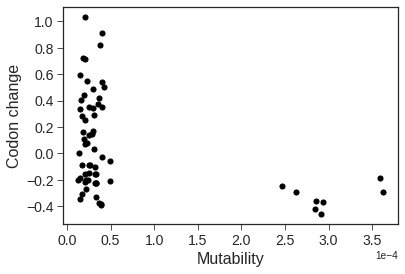

In [24]:
plt.scatter(plotting_df.mutability, plotting_df.codon_mean_change, color = "k", s = 26)
plt.ylabel("Codon change", size = 16)
plt.xlabel("Mutability", size = 16)
plt.xticks(size = 14)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))#sci limits specify the e^x number beyond whic you need to use sci notaton
plt.yticks(size = 14)
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d").replace("/", "_").replace(":", "_")
# plt.savefig("plots/Codon_change_{t}.png".format(t=timestamp))

In [6]:
regression_mut_x = np.array(list(plotting_df.mutability)).reshape((-1,1))
regression_change_y = np.array(list(plotting_df.codon_mean_change))

regres_model =  LinearRegression().fit(regression_mut_x, regression_change_y)
print('r^2: ', regres_model.score(regression_mut_x, regression_change_y), "slope: ", regres_model.coef_)

r^2:  0.1515231881963668 slope:  [-1571.87242968]


In [8]:
est_mutChange = sm.OLS(regression_change_y, sm.add_constant(regression_mut_x)).fit()

In [9]:
print(est_mutChange.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     11.07
Date:                Thu, 04 Mar 2021   Prob (F-statistic):            0.00148
Time:                        09:31:32   Log-Likelihood:                -21.479
No. Observations:                  64   AIC:                             46.96
Df Residuals:                      62   BIC:                             51.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1542      0.052      2.976      0.0

##  **non_cpgs only now** 

In [13]:
plotting_df_nonCpg = plotting_df[plotting_df.mutability <= 0.0002]

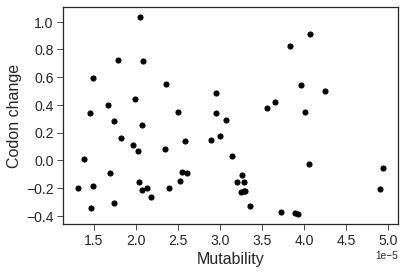

In [26]:
plt.scatter(plotting_df_nonCpg.mutability, plotting_df_nonCpg.codon_mean_change, color = "k", s = 26)
plt.ylabel("Codon change", size = 16)
plt.xlabel("Mutability", size = 16)
plt.xticks(size = 14)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))#sci limits specify the e^x number beyond whic you need to use sci notaton
plt.yticks(size = 14)
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d").replace("/", "_").replace(":", "_")
# plt.savefig("plots/Codon_change_{t}_nonCpgs.png".format(t=timestamp))

In [15]:
regression_mut_x_nonCpg = np.array(list(plotting_df_nonCpg.mutability)).reshape((-1,1))
regression_change_y_nonCpg = np.array(list(plotting_df_nonCpg.codon_mean_change))

regres_model_nonCpg =  LinearRegression().fit(regression_mut_x_nonCpg, regression_change_y_nonCpg)
print('r^2: ', regres_model.score(regression_mut_x_nonCpg, regression_change_y_nonCpg), "slope: ", regres_model_nonCpg.coef_)

r^2:  0.0006132441565321889 slope:  [-1088.83541317]


In [16]:
est_mutChange_nonCpg = sm.OLS(regression_change_y_nonCpg, sm.add_constant(regression_mut_x_nonCpg)).fit()

In [17]:
print(est_mutChange_nonCpg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.04332
Date:                Thu, 04 Mar 2021   Prob (F-statistic):              0.836
Time:                        09:35:59   Log-Likelihood:                -22.072
No. Observations:                  56   AIC:                             48.14
Df Residuals:                      54   BIC:                             52.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1429      0.151      0.944      0.3